In [7]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

%matplotlib inline

In [8]:
features = ['Malignancy', 'Diameter', 'Lobulation', 'Spiculation']

In [9]:
%run 'CNNBlocks.ipynb'
%run 'modelArchitectureRegression.ipynb'
%run 'batchGeneratorRegression.ipynb'

In [10]:
validInd = {}
for key in ['random', 'true']:
    validInd[key] = np.load('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/valid_inds_'+key+'.npy')

In [11]:
modelPath = '/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_regression.h5'
modelPathClass = '/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_class.h5'

In [ ]:
print ('Loading positive patches')
xPosTrain, ixPosTrain, xPosValid, ixPosValid = nodulePredictor('true', modelPathClass, validInd)

print ('Loading negative patches')
xNegTrain, ixNegTrain, xNegValid, ixNegValid = nodulePredictor('random', modelPathClass, validInd)

print ('Loading false positive patches')
xFP, ixFP = loadCategory('false')

Loading positive patches


/opt/anaconda/lib/python3.5/site-packages/keras/engine/topology.py:1206: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [ ]:
#Compiling model with branching on the level of Convolution block #5
model = compileModelDeepBranching((1,64,64,64), dropRate=0.2, regRate=1e-3)

In [ ]:
nbEpochs = 10

model, lossHist = trainRegressionModel(model, modelPath=modelPath, modelPathClass=modelPathClass,
                                       validInd=validInd, posFraction=0.7,
                                       batchSize=30, nbEpoch=nbEpochs, stepsPerEpoch=50)

model.save_weights('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_weights_regression.h5')

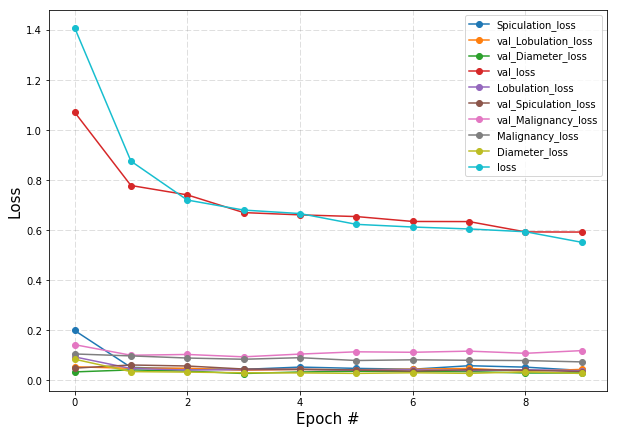

In [49]:
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Epoch #', fontsize=15)
plt.ylabel('Loss', fontsize=15)

labels=list(lossHist.keys())

for i,key in enumerate(lossHist):
    plt.plot([x for x in range(nbEpochs)], lossHist[key], 'o-', label=labels[i])
    plt.legend()
    
plt.savefig('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/figures/' + str(version) + '.png')

In [48]:
version = 2.3

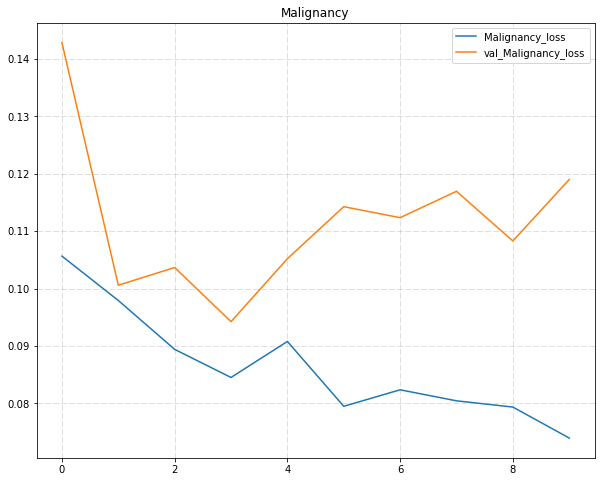

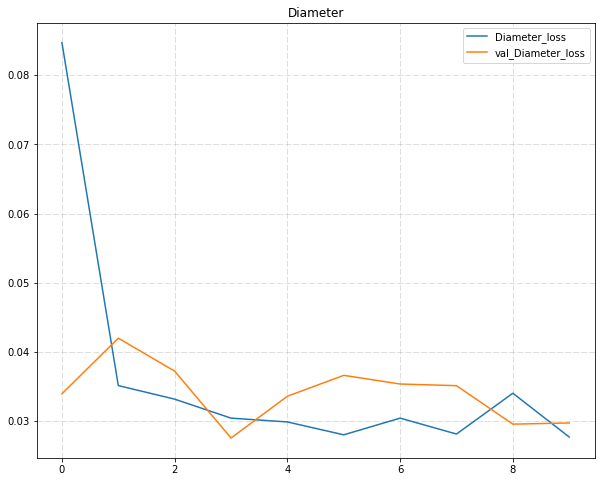

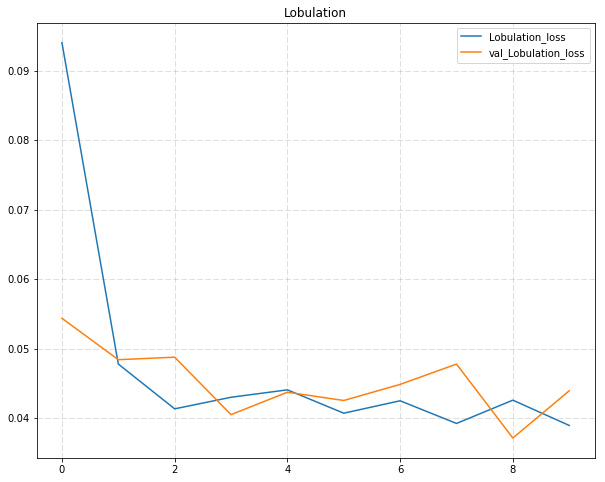

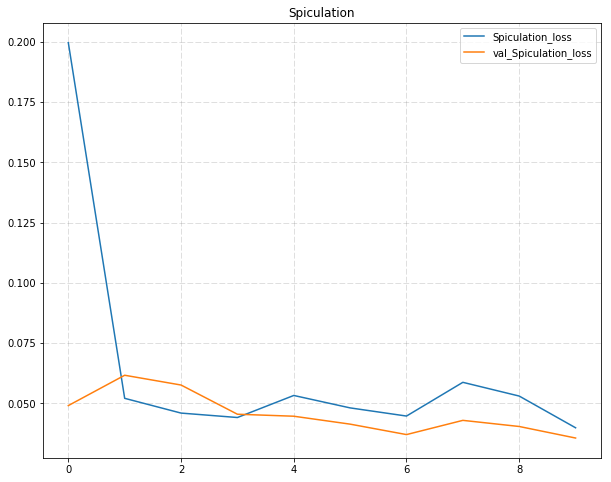

In [50]:
for feature in features:
    plt.figure(figsize=[10,8])
    plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')

    plt.plot([x for x in range(nbEpochs)], lossHist[feature+'_loss'], label=feature+'_loss')
    plt.plot([x for x in range(nbEpochs)], lossHist['val_'+feature+'_loss'], label='val_'+feature+'_loss')
    plt.title(feature)
    plt.legend()
    plt.savefig('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/figures/'+str(version)+'.'+feature+'.png')